In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

### Simple 1-neuron NN with manual calculation of forward and backward pass

In [2]:
X_train = np.array([[4.5],[6.5],[1.2],[3.2],[9.8],[5.6],[9.8],[8.3],[2.4],[4.5],[1.9],[7.3],[2.8],[6.9],[3.3],[5.8],[3.1],[2.2],[4.4],[8.9],[7.3],[2.7],[9.9],[5.4]],dtype=np.float32)
y_train = np.array([[1.5],[3.5],[5.2],[2.2],[8.8],[6.6],[5.8],[9.3],[1.4],[2.5],[7.9],[3.3],[8.8],[4.9],[5.3],[4.8],[1.1],[7.2],[8.4],[5.9],[9.3],[5.7],[3.9],[4.4]],dtype=np.float32)

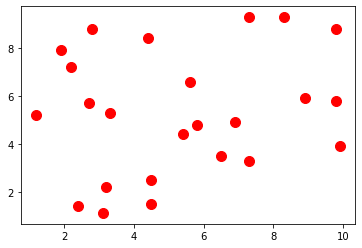

In [3]:
plt.scatter(X_train, y_train, c='r',s=100,label='original data')
plt.show()

In [4]:
X = torch.from_numpy(X_train)
y = torch.from_numpy(y_train)

In [5]:
inp = 1
hid = 1
out = 1
lr = 0.001

In [6]:
w1 = torch.rand(inp,hid,requires_grad=True)
b1 = torch.rand(hid,out,requires_grad=True)

In [7]:
w1

tensor([[0.8146]], requires_grad=True)

In [8]:
b1

tensor([[0.4511]], requires_grad=True)

In [9]:
for iter in range(1,1100):
    y_pred = X.mm(w1).clamp(min=0).add(b1)
    loss = (y_pred-y).pow(2).sum()
    
    if iter % 100 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 158.99867248535156
200 149.6129608154297
300 148.20028686523438
400 147.98765563964844
500 147.9556427001953
600 147.95083618164062
700 147.9501190185547
800 147.9499969482422
900 147.9499969482422
1000 147.95001220703125


In [10]:
print(w1)
print(b1)

tensor([[0.1898]], requires_grad=True)
tensor([[4.3108]], requires_grad=True)


In [11]:
predicted = X.mm(w1).clamp(min=0).add(b1)
predicted = predicted.detach().numpy()

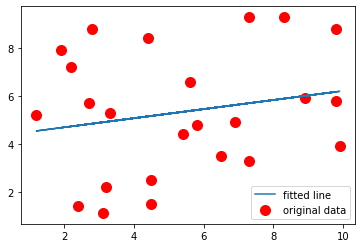

In [12]:
plt.scatter(X_train, y_train, c='r',s=100,label='original data')
plt.plot(X_train,predicted, label='fitted line')
plt.legend()
plt.show()

### Simple NN with PyTorch library methods

In [22]:
X_train = np.array([[4.5],[6.5],[1.2],[3.2],[9.8],[5.6],[9.8],[8.3],[2.4],[4.5],[1.9],[7.3],[2.8],[6.9],[3.3],[5.8],[3.1],[2.2],[4.4],[8.9],[7.3],[2.7],[9.9],[5.4]],dtype=np.float32)
y_train = np.array([[1.5],[3.5],[5.2],[2.2],[8.8],[6.6],[5.8],[9.3],[1.4],[2.5],[7.9],[3.3],[8.8],[4.9],[5.3],[4.8],[1.1],[7.2],[8.4],[5.9],[9.3],[5.7],[3.9],[4.4]],dtype=np.float32)

In [23]:
X = torch.from_numpy(X_train)
y = torch.from_numpy(y_train)

In [24]:
inp = 1
hid = 5
out = 1
lr = 0.001

In [25]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp,hid),
        torch.nn.ReLU(),
        torch.nn.Linear(hid,out))

In [26]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for iter in range(500):
    y_pred = model(X)
    
    loss = loss_fn(y_pred, y)
    
    if iter % 100 == 0:
        print(iter, loss.item())
    
    #model.zero_grad()
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #with torch.no_grad():
        #for param in model.parameters():
        #    param -= lr * param.grad

0 1283.009765625
100 154.1410369873047
200 154.09957885742188
300 154.09957885742188
400 154.09957885742188


In [28]:
print(w1)
print(b1)

tensor([[0.1898]], requires_grad=True)
tensor([[4.3108]], requires_grad=True)


In [29]:
predicted = X.mm(w1).clamp(min=0).add(b1)
predicted = predicted.detach().numpy()

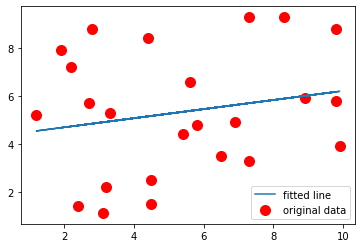

In [30]:
plt.scatter(X_train, y_train, c='r',s=100,label='original data')
plt.plot(X_train,predicted, label='fitted line')
plt.legend()
plt.show()